In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Define paths:
pathtoResults = r'/content/drive/Shareddrives/Eye_Tracking_NN_SD/Image_processing/Publishable_material/Models_performance/Logit/'

#2. Load saved performance results


In [4]:
# Read results:
rt = pd.read_csv (pathtoResults + 'outcome_logit_timing.csv')
rp = pd.read_csv (pathtoResults + 'outcome_logit_percentage.csv')

In [5]:
rt

,Unnamed: 0,Dataset1,ACCURACY,AUC,PR,Recall,f1-score,BACC
0,X1,full,0.673529,0.679644,0.604094,0.799587,0.699187,0.688428
1,X1.1,15s,0.663725,0.669314,0.596864,0.778926,0.687329,0.676054
2,X1.2,10s,0.657843,0.663115,0.592510,0.766529,0.680110,0.668797
3,X1.3,5s,0.639216,0.644088,0.577980,0.739669,0.660517,0.648333
4,X1.4,2s,0.617647,0.622464,0.561064,0.716942,0.640221,0.626071


In [6]:
rp

,Unnamed: 0,Dataset2,ACCURACY,AUC,PR,Recall,f1-score,BACC
0,X1,full,0.673529,0.679644,0.604094,0.799587,0.699187,0.688428
1,X1.1,80,0.661765,0.668250,0.594067,0.795455,0.690583,0.677822
2,X1.2,50,0.650980,0.655683,0.587665,0.747934,0.670370,0.659823
3,X1.3,30,0.625490,0.628223,0.569108,0.681818,0.633397,0.629032
4,X1.4,15,NaN,0.604115,0.550957,0.625523,0.598599,0.603922


In [7]:
rp = rp.rename({'ACCURACY': 'accuracy', 'AUC': 'auc', 'PR': 'precision', 'Recall':'recall', 'f1-score': 'f1'}, axis=1)
rt = rt.rename({'ACCURACY': 'accuracy', 'AUC': 'auc', 'PR': 'precision', 'Recall':'recall', 'f1-score': 'f1'}, axis=1)

# 3. Plot results by timings and percentages

In [8]:
def plot_metrics(data1, data2, name_file):
  metrics = ['accuracy_timings', 'accuracy_percentages', 'auc_timings', 'auc_percentages', 'precision_timings', 'precision_percentages','recall_timings', 'recall_percentages', 'f1_timings', 'f1_percentages']
  fig, ax = plt.subplots(3,4, figsize=(30,20))
  fig.suptitle('Logit Model Metric Plots',fontsize=40)
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    mtc = metric.split("_", 1)[0]
    plt.subplot(3,4,n+1)
    if n ==0:
      plt.plot(data1.iloc[:,1], data1[mtc], linewidth=3)
    elif n % 2 == 0:
      plt.plot(data1.iloc[:,1], data1[mtc], linewidth=3)
    else:
      plt.plot(data2.iloc[:,1], data2[mtc], linewidth=3)
    plt.xlabel('Dataset', fontsize=10)
    plt.title(str(name))
    plt.savefig(pathtoResults + name_file)


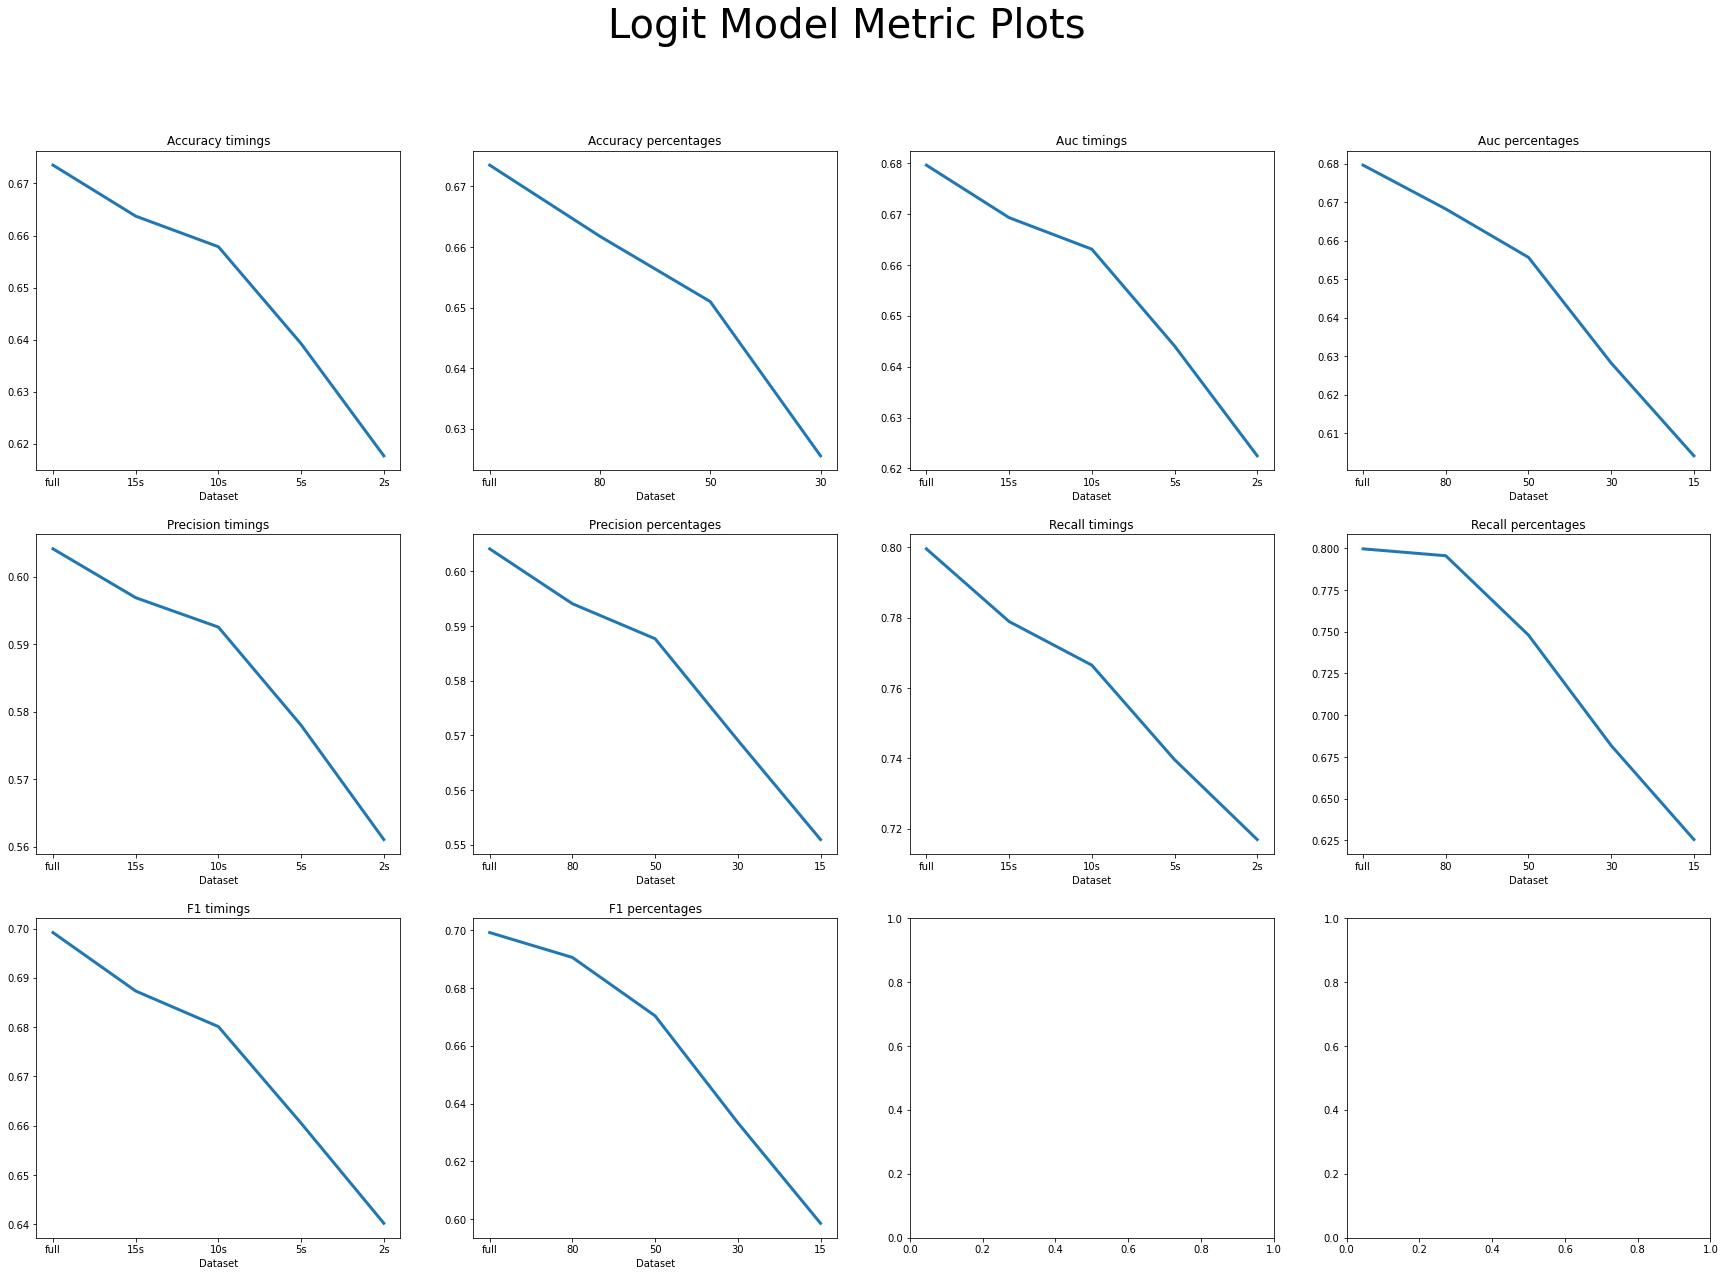

In [9]:
plot_metrics(rt, rp, "results_Logit_EQ.png")